In [ ]:
import pandas as pd

df = pd.read_csv("/content/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

data = pd.DataFrame(df["Embarked"], columns=["Embarked"])
data

,Embarked
0,Q
1,S
2,Q
3,S
4,S
...,...
413,S
414,C
415,S
416,S


In [ ]:
# oe = OrdinalEncoder(categories=[["Q","S","C"]]) # Optional => Q < S < C

oe = OrdinalEncoder()
data = oe.fit_transform(data)
data

array([[1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [0.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [1.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],

In [ ]:
oe.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/cars.csv")
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [ ]:
print(df['brand'].nunique(), df['brand'].value_counts())

32 brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64


## OHE using pandas

Not recommended, as it does not maintain the sequence of newly made columns

In [ ]:
pd.get_dummies(df, columns=['fuel', 'owner'])
pd.get_dummies(df, columns=['fuel', 'owner'], drop_first=True) # To handle multicollinearity

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,True,False,False,False,False,False,False
1,Skoda,120000,370000,True,False,False,False,True,False,False
2,Honda,140000,158000,False,False,True,False,False,False,True
3,Hyundai,127000,225000,True,False,False,False,False,False,False
4,Maruti,120000,130000,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,True,False,False,False,False
8124,Hyundai,119000,135000,True,False,False,True,False,False,False
8125,Maruti,120000,382000,True,False,False,False,False,False,False
8126,Tata,25000,290000,True,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:4]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse_output=False)

X_train_new = ohe.fit_transform(X_train[['fuel', 'owner']]) # we have to do it explicitly on differrent columns
X_test_new = ohe.transform(X_test[['fuel', 'owner']])

In [ ]:
X_train[['brand', 'km_driven']].values.ndim
X_train_new.ndim

2

In [ ]:
np.hstack((X_train[['brand', 'km_driven']].values, X_train_new))

array([['Hyundai', 35000, 1.0, ..., 0.0, 0.0, 0.0],
       ['Jeep', 60000, 1.0, ..., 0.0, 0.0, 0.0],
       ['Hyundai', 25000, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       ['Tata', 15000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Maruti', 32500, 1.0, ..., 1.0, 0.0, 0.0],
       ['Isuzu', 121000, 1.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv("/content/covid_toy.csv")

In [ ]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['has_covid']), df['has_covid'],
                                                    test_size=0.2)

In [ ]:
df.isnull().sum()

,0
age,0
gender,0
fever,10
cough,0
city,0
has_covid,0


## Without Column Transformer

In [ ]:
si = SimpleImputer()

X_train_fever = si.fit_transform(X_train[['fever']])
X_test_fever = si.transform(X_test[['fever']])

pd.DataFrame(X_train_fever).isnull().sum()
X_train_fever.ndim

2

In [ ]:
oe = OrdinalEncoder(categories=[['Mild', 'Strong']])

X_train_cough = oe.fit_transform(X_train[['cough']])
X_test_cough = oe.transform(X_test[['cough']])

X_test_cough.shape

(20, 1)

In [ ]:
ohe = OneHotEncoder(drop='first', sparse_output=False)

X_train_gender_city = ohe.fit_transform(X_train[['gender', 'city']])
X_test_gender_city = ohe.fit_transform(X_test[['gender', 'city']])

X_train_gender_city.shape

(80, 4)

In [ ]:
X_train_age = X_train.drop(columns=['gender', 'fever', 'cough', 'city'])
X_test_age = X_test.drop(columns=['gender', 'fever', 'cough', 'city'])

X_train_age.ndim

2

In [ ]:
X_train_transformed = np.concatenate((X_train_age, X_train_fever, X_train_cough, X_train_gender_city), axis=1)
X_test_transformed = np.concatenate((X_test_age, X_test_fever, X_test_cough, X_test_gender_city), axis=1)

X_train_transformed

array([[ 47.        , 100.        ,   1.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [ 11.        , 100.        ,   1.        ,   0.        ,
          0.        ,   1.        ,   0.        ],
       [ 38.        , 101.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [ 64.        , 102.        ,   0.        ,   1.        ,
          0.        ,   0.        ,   0.        ],
       [ 60.        ,  99.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   1.        ],
       [ 34.        , 101.        ,   1.        ,   0.        ,
          1.        ,   0.        ,   0.        ],
       [  5.        ,  98.        ,   1.        ,   0.        ,
          0.        ,   0.        ,   1.        ],
       [ 44.        , 104.        ,   0.        ,   1.        ,
          0.        ,   0.        ,   1.        ],
       [ 49.        ,  99.        ,   1.        ,   0.        ,
          0.    

## With Column Transformer

In [ ]:
from sklearn.compose import ColumnTransformer

tf = ColumnTransformer(transformers=[
    ['tnf1', SimpleImputer(), ['fever']],
    ['tnf2', OrdinalEncoder(categories=[['Mild', 'Strong']]), ['cough']],
    ['tnf3', OneHotEncoder(drop='first', sparse_output=False), ['gender', 'city']]
], remainder='passthrough')

In [ ]:
df = tf.fit_transform(X_train)
df.shape

(80, 7)

## handling numerical data

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv("/content/titanic.csv", usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(331, 3)

In [9]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf  = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

print(np.mean(cross_val_score(clf, X_test, y_test, cv=10, scoring='accuracy')))

0.6738095238095237


In [11]:
k_bins_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
k_bins_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')

trf = ColumnTransformer([
    ('first', k_bins_age, ['Age']),
    ('second', k_bins_fare, ['Fare'])
])

X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

trf.named_transformers_['first'].bin_edges_

array([array([ 0.33      ,  7.25888889, 15.7281746 , 23.53071084, 30.74735605,
              38.22815315, 45.09692982, 51.83603239, 59.0034965 , 69.27272727,
              76.        ])                                                   ],
      dtype=object)

In [15]:
op = pd.DataFrame( {
    'age': X_train['Age'],
    'age_transformed': X_train_transformed[:,0],
    'fare': X_train['Fare'],
    'fare_transformed': X_train_transformed[:,1],
    'Survived': y_train
})

op

,age,age_transformed,fare,fare_transformed,Survived
281,0.75,0.0,13.7750,0.0,0
96,76.00,9.0,78.8500,3.0,1
341,32.00,4.0,7.5792,0.0,0
18,27.00,3.0,7.9250,0.0,1
26,22.00,2.0,61.9792,2.0,1
...,...,...,...,...,...
237,20.00,2.0,7.2250,0.0,0
86,27.00,3.0,7.8792,0.0,1
134,43.00,5.0,7.8958,0.0,0
345,16.00,2.0,7.6500,0.0,1


In [16]:
op['age_bin'] = pd.cut(x=X_train['Age'], bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
op['fare_bin'] = pd.cut(x=X_train['Fare'], bins=trf.named_transformers_['second'].bin_edges_[0].tolist())
op

,age,age_transformed,fare,fare_transformed,Survived,age_bin,fare_bin
281,0.75,0.0,13.7750,0.0,0,"(0.33, 7.259]","(0.0, 18.539]"
96,76.00,9.0,78.8500,3.0,1,"(69.273, 76.0]","(63.264, 87.672]"
341,32.00,4.0,7.5792,0.0,0,"(30.747, 38.228]","(0.0, 18.539]"
18,27.00,3.0,7.9250,0.0,1,"(23.531, 30.747]","(0.0, 18.539]"
26,22.00,2.0,61.9792,2.0,1,"(15.728, 23.531]","(38.881, 63.264]"
...,...,...,...,...,...,...,...
237,20.00,2.0,7.2250,0.0,0,"(15.728, 23.531]","(0.0, 18.539]"
86,27.00,3.0,7.8792,0.0,1,"(23.531, 30.747]","(0.0, 18.539]"
134,43.00,5.0,7.8958,0.0,0,"(38.228, 45.097]","(0.0, 18.539]"
345,16.00,2.0,7.6500,0.0,1,"(15.728, 23.531]","(0.0, 18.539]"


In [18]:
clf  = DecisionTreeClassifier()
clf.fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)

print(accuracy_score(y_test, y_pred))
print(np.mean(cross_val_score(clf, X_test_transformed, y_test, cv=10, scoring='accuracy')))

0.6567164179104478
0.7047619047619048


## binarizer

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [22]:
df = pd.read_csv("/content/titanic.csv", usecols=['Age', 'Fare', 'Survived', 'SibSp', 'Parch'])
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,34.5,0,0,7.8292
1,1,47.0,1,0,7.0000
2,0,62.0,0,0,9.6875
3,0,27.0,0,0,8.6625
4,1,22.0,1,1,12.2875


In [23]:
df.dropna(inplace=True)

In [24]:
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,34.5,0,0,7.8292
1,1,47.0,1,0,7.0000
2,0,62.0,0,0,9.6875
3,0,27.0,0,0,8.6625
4,1,22.0,1,1,12.2875


In [25]:
df['family'] = df['SibSp'] + df['Parch']

In [26]:
df = df.drop(columns=['SibSp', 'Parch'])

In [27]:
df

,Survived,Age,Fare,family
0,0,34.5,7.8292,0
1,1,47.0,7.0000,1
2,0,62.0,9.6875,0
3,0,27.0,8.6625,0
4,1,22.0,12.2875,2
...,...,...,...,...
409,1,3.0,13.7750,2
411,1,37.0,90.0000,1
412,1,28.0,7.7750,0
414,1,39.0,108.9000,0


In [28]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf  = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

print(np.mean(cross_val_score(clf, X_test, y_test, cv=10, scoring='accuracy')))

0.7166666666666666


In [29]:
from sklearn.preprocessing import Binarizer

trf = ColumnTransformer([
    ('first', Binarizer(copy=False), ['family'])
], remainder='passthrough')

X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [33]:
df = pd.DataFrame(X_train_transformed, columns=['family', 'Age', 'Fare'])

In [34]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf  = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

print(np.mean(cross_val_score(clf, X_test, y_test, cv=10, scoring='accuracy')))

0.73


# handling mixed data

In [41]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/titanic.csv", usecols=['Cabin', 'Ticket', 'Survived', 'SibSp', 'Parch'])

df['number'] = df['SibSp'] + df['Parch']
df = df.drop(columns=['SibSp', 'Parch'])

df['number'] = df['number'].apply(lambda x : 'A' if x == 0 else x)

df.head()

,Survived,Ticket,Cabin,number
0,0,330911,NaN,A
1,1,363272,NaN,1
2,0,240276,NaN,A
3,0,315154,NaN,A
4,1,3101298,NaN,2


In [42]:
df['number'].unique()

array(['A', 1, 2, 4, 3, 5, 7, 6, 10], dtype=object)

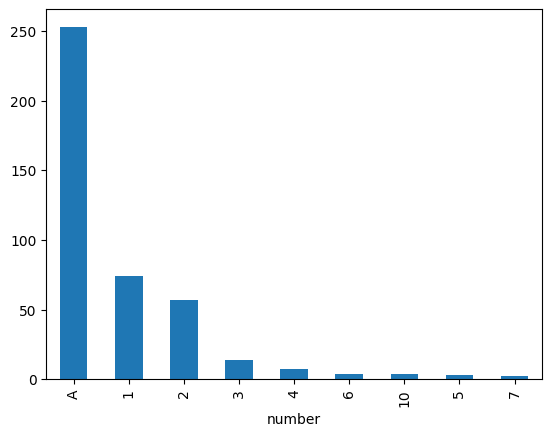

In [43]:
fig = df['number'].value_counts().plot(kind='bar')

In [44]:
df['number_numerical'] = pd.to_numeric(df['number'], errors='coerce', downcast='integer')
df['number_categorical'] = np.where(df['number_numerical'].isnull(), df['number'], np.nan)
df.head()

,Survived,Ticket,Cabin,number,number_numerical,number_categorical
0,0,330911,NaN,A,NaN,A
1,1,363272,NaN,1,1.0,NaN
2,0,240276,NaN,A,NaN,A
3,0,315154,NaN,A,NaN,A
4,1,3101298,NaN,2,2.0,NaN


In [45]:
df['cabin_numeric'] = df['Cabin'].str.extract('(\d+)') # captures numerical part
df['cabin_category'] = df['Cabin'].str[0] # Captures first character

df.sample(10)

,Survived,Ticket,Cabin,number,number_numerical,number_categorical,cabin_numeric,cabin_category
31,0,C.A. 31029,NaN,2,2.0,NaN,NaN,NaN
259,0,345501,NaN,A,NaN,A,NaN,NaN
411,1,19928,C78,1,1.0,NaN,78,C
262,1,29103,NaN,2,2.0,NaN,NaN,NaN
234,0,PC 17599,C85,1,1.0,NaN,85,C
370,0,28133,NaN,1,1.0,NaN,NaN,NaN
149,0,250651,NaN,2,2.0,NaN,NaN,NaN
113,1,329944,NaN,A,NaN,A,NaN,NaN
282,1,364859,NaN,A,NaN,A,NaN,NaN
145,0,345763,NaN,3,3.0,NaN,NaN,NaN


In [46]:
df['ticket_numerical'] = df['Ticket'].apply(lambda x : x.split()[-1])
df['ticket_numerical'].unique()

df['ticket_numerical'] = pd.to_numeric(df['ticket_numerical'], errors='coerce', downcast='integer')

df['ticket_categorical'] = df['Ticket'].apply(lambda x : x.split()[0])
df['ticket_categorical'] = np.where(df['Ticket'].str.isdigit(), np.nan, df['ticket_categorical'])

df.sample(10)

,Survived,Ticket,Cabin,number,number_numerical,number_categorical,cabin_numeric,cabin_category,ticket_numerical,ticket_categorical
358,0,368402,NaN,A,NaN,A,NaN,NaN,368402,NaN
125,1,371362,NaN,1,1.0,NaN,NaN,NaN,371362,NaN
226,0,350054,NaN,A,NaN,A,NaN,NaN,350054,NaN
379,0,347077,NaN,6,6.0,NaN,NaN,NaN,347077,NaN
186,1,S.O./P.P. 2,NaN,1,1.0,NaN,NaN,NaN,2,S.O./P.P.
417,0,2668,NaN,2,2.0,NaN,NaN,NaN,2668,NaN
325,0,SOTON/O.Q. 3101309,NaN,A,NaN,A,NaN,NaN,3101309,SOTON/O.Q.
105,0,C 4001,NaN,A,NaN,A,NaN,NaN,4001,C
290,0,PC 17607,NaN,A,NaN,A,NaN,NaN,17607,PC
339,0,2622,NaN,A,NaN,A,NaN,NaN,2622,NaN


# Handling Date and Time

In [80]:
import pandas as pd
import numpy as np

date = pd.read_csv("/content/orders.csv")
time = pd.read_csv("/content/messages.csv")

date.sample(10)

,date,product_id,city_id,orders
358,2019-01-19,6295,3,44
528,2019-11-17,7015,26,3
563,2019-04-11,7294,1,2
874,2019-05-26,2430,23,17
333,2019-10-31,1494,25,71
800,2018-12-06,586,28,3
178,2019-04-30,4776,16,100
296,2018-12-05,3601,9,2
203,2019-12-16,4033,4,1
416,2019-08-02,664,24,1


In [81]:
time.sample(10)

,date,msg
308,2013-06-05 00:28:00,Парни - заедим 0957640870
577,2014-04-24 23:00:00,я П ищу Д инт тел 0634733074 Днепр
590,2014-01-10 23:00:00,Ищу некурящего П для с.о. 30-34 лет СМС 063814...
953,2015-04-29 00:45:00,. М. Сделаю даме очень приятно. 0963242434. Мо...
443,2013-11-11 00:50:00,шальная девченка познакомится с таким же парне...
269,2014-07-06 00:03:00,п 30 поз с дев до 45 для встречи сейчас 096524...
788,2012-09-13 00:27:00,парень 33 приг стр дев/ж за *** в гости 8063 ...
814,2013-09-08 23:30:00,Ж 18 инт с М 50 и больше для опыта Лера
542,2013-10-21 00:48:00,обосп Ж 35 ищу М до 25 для ои Валентина
561,2013-06-13 01:46:00,обеспеченая Ж 30 ищу любовника для встречь на ...


In [82]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [83]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [84]:
date['date'] = pd.to_datetime(date['date'])
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   product_id  1000 non-null   int64         
 2   city_id     1000 non-null   int64         
 3   orders      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


## Extract year

In [85]:
date['date_year'] = date['date'].dt.year
date.sample(10)

,date,product_id,city_id,orders,date_year
358,2019-01-19,6295,3,44,2019
927,2018-12-04,219,3,3,2018
810,2019-06-25,1187,2,45,2019
586,2019-06-26,2563,18,8,2019
705,2018-10-21,7099,26,4,2018
113,2018-12-15,6288,2,2,2018
856,2019-10-18,4594,22,6,2019
411,2019-12-11,3179,22,16,2019
720,2019-04-01,6212,7,3,2019
345,2018-07-26,6857,18,61,2018


In [86]:
date['date_month'] = date['date'].dt.month
date.sample(10)

,date,product_id,city_id,orders,date_year,date_month
674,2018-08-31,4867,9,5,2018,8
824,2018-09-24,7384,5,9,2018,9
869,2018-12-30,2542,0,2,2018,12
891,2018-11-18,3904,1,9,2018,11
28,2019-04-20,5501,16,1,2019,4
181,2019-04-12,1744,13,2,2019,4
680,2019-11-17,4111,18,2,2019,11
21,2018-08-19,1191,13,50,2018,8
340,2019-11-02,2088,26,8,2019,11
600,2019-10-18,3464,0,2,2019,10


In [87]:
date['date_month_name'] = date['date'].dt.month_name()
date.sample(10)

,date,product_id,city_id,orders,date_year,date_month,date_month_name
440,2018-10-31,4382,23,5,2018,10,October
63,2018-08-29,2841,16,3,2018,8,August
301,2018-08-18,2301,14,1,2018,8,August
155,2019-03-04,3888,0,1,2019,3,March
607,2019-05-27,3685,0,1,2019,5,May
631,2019-06-30,4323,4,7,2019,6,June
719,2018-11-14,5965,13,10,2018,11,November
548,2019-11-03,5917,2,59,2019,11,November
487,2019-04-18,6095,9,1,2019,4,April
525,2019-06-13,2249,20,2,2019,6,June


In [88]:
date['date_day'] = date['date'].dt.day
date.sample(10)

,date,product_id,city_id,orders,date_year,date_month,date_month_name,date_day
540,2018-09-26,7350,16,23,2018,9,September,26
568,2019-12-01,4505,25,1,2019,12,December,1
840,2019-03-29,2837,18,131,2019,3,March,29
29,2019-02-20,172,0,7,2019,2,February,20
164,2019-06-26,6097,9,4,2019,6,June,26
951,2018-08-02,2238,22,5,2018,8,August,2
302,2018-10-05,2012,8,32,2018,10,October,5
228,2019-05-15,6683,13,8,2019,5,May,15
269,2019-03-21,6567,25,1,2019,3,March,21
458,2019-08-02,5742,26,1,2019,8,August,2


In [89]:
date['date_dayofweek'] = date['date'].dt.dayofweek
date.sample(10)

,date,product_id,city_id,orders,date_year,date_month,date_month_name,date_day,date_dayofweek
636,2018-11-01,1744,13,4,2018,11,November,1,3
841,2019-11-17,5250,3,13,2019,11,November,17,6
733,2019-07-10,3081,30,5,2019,7,July,10,2
881,2019-07-14,2897,26,6,2019,7,July,14,6
709,2018-11-21,3916,27,2,2018,11,November,21,2
0,2019-12-10,5628,25,3,2019,12,December,10,1
647,2018-09-05,6556,23,2,2018,9,September,5,2
60,2018-08-05,3760,28,1,2018,8,August,5,6
766,2018-07-13,3454,14,8,2018,7,July,13,4
869,2018-12-30,2542,0,2,2018,12,December,30,6


In [90]:
date['date_dayofweek_name'] = date['date'].dt.day_name()
date.sample(10)

,date,product_id,city_id,orders,date_year,date_month,date_month_name,date_day,date_dayofweek,date_dayofweek_name
322,2019-06-23,652,25,5,2019,6,June,23,6,Sunday
56,2018-11-12,3667,13,20,2018,11,November,12,0,Monday
258,2019-11-04,1775,25,1,2019,11,November,4,0,Monday
113,2018-12-15,6288,2,2,2018,12,December,15,5,Saturday
700,2019-10-23,2669,25,20,2019,10,October,23,2,Wednesday
613,2019-04-20,7430,1,2,2019,4,April,20,5,Saturday
309,2019-08-14,4352,16,1,2019,8,August,14,2,Wednesday
771,2019-06-17,2897,26,1,2019,6,June,17,0,Monday
880,2019-10-25,1527,13,2,2019,10,October,25,4,Friday
941,2018-11-11,4108,13,3,2018,11,November,11,6,Sunday


In [91]:
date['date_is_weekend'] = np.where(date['date_dayofweek_name'].isin(['Sunday', 'Saturday']), 1,0)
date.sample(10)

,date,product_id,city_id,orders,date_year,date_month,date_month_name,date_day,date_dayofweek,date_dayofweek_name,date_is_weekend
95,2019-04-02,5383,11,24,2019,4,April,2,1,Tuesday,0
318,2019-07-17,7223,2,28,2019,7,July,17,2,Wednesday,0
606,2018-11-24,2870,25,8,2018,11,November,24,5,Saturday,1
676,2018-09-27,6264,25,11,2018,9,September,27,3,Thursday,0
454,2019-10-15,1766,22,15,2019,10,October,15,1,Tuesday,0
984,2019-11-23,528,0,3,2019,11,November,23,5,Saturday,1
624,2018-11-09,1737,1,8,2018,11,November,9,4,Friday,0
791,2019-06-30,4590,22,1,2019,6,June,30,6,Sunday,1
345,2018-07-26,6857,18,61,2018,7,July,26,3,Thursday,0
826,2018-09-22,944,28,1,2018,9,September,22,5,Saturday,1


In [92]:
date['date_quarter'] = date['date'].dt.quarter
date.sample(10)

,date,product_id,city_id,orders,date_year,date_month,date_month_name,date_day,date_dayofweek,date_dayofweek_name,date_is_weekend,date_quarter
783,2019-08-11,582,26,3,2019,8,August,11,6,Sunday,1,3
129,2018-12-06,7413,13,6,2018,12,December,6,3,Thursday,0,4
325,2019-06-13,7057,2,6,2019,6,June,13,3,Thursday,0,2
476,2019-04-04,5979,21,2,2019,4,April,4,3,Thursday,0,2
454,2019-10-15,1766,22,15,2019,10,October,15,1,Tuesday,0,4
205,2019-12-05,5722,25,260,2019,12,December,5,3,Thursday,0,4
348,2019-02-09,1848,14,135,2019,2,February,9,5,Saturday,1,1
297,2019-12-02,5653,17,4,2019,12,December,2,0,Monday,0,4
681,2018-09-08,6483,28,2,2018,9,September,8,5,Saturday,1,3
194,2019-08-09,5,16,1,2019,8,August,9,4,Friday,0,3


In [93]:
date['date_semester'] = np.where(date['date_quarter'].isin([1,2]), 1, 2)
date.sample(10)

,date,product_id,city_id,orders,date_year,date_month,date_month_name,date_day,date_dayofweek,date_dayofweek_name,date_is_weekend,date_quarter,date_semester
239,2019-02-19,4823,18,26,2019,2,February,19,1,Tuesday,0,1,1
463,2018-11-21,1945,9,3,2018,11,November,21,2,Wednesday,0,4,2
580,2018-09-29,5965,13,2,2018,9,September,29,5,Saturday,1,3,2
138,2019-06-04,4635,22,12,2019,6,June,4,1,Tuesday,0,2,1
416,2019-08-02,664,24,1,2019,8,August,2,4,Friday,0,3,2
793,2019-08-19,5448,1,12,2019,8,August,19,0,Monday,0,3,2
287,2018-12-15,6368,25,1,2018,12,December,15,5,Saturday,1,4,2
568,2019-12-01,4505,25,1,2019,12,December,1,6,Sunday,1,4,2
584,2018-12-16,1520,26,168,2018,12,December,16,6,Sunday,1,4,2
931,2018-12-14,2654,11,1,2018,12,December,14,4,Friday,0,4,2


In [94]:
import datetime

today = datetime.datetime.today()

today

datetime.datetime(2024, 10, 19, 10, 8, 1, 149242)

In [115]:
date['duration'] = today - date['date']

df.sample(10)

,Survived,Ticket,Cabin,number,number_numerical,number_categorical,cabin_numeric,cabin_category,ticket_numerical,ticket_categorical,duration,hour,minute,second
393,0,C.A. 30769,NaN,A,NaN,A,NaN,NaN,30769,C.A.,1980 days 10:08:01.149242,23,37,0
96,1,19877,C46,1,1.0,NaN,46,C,19877,NaN,2249 days 10:08:01.149242,0,32,0
183,0,7935,NaN,A,NaN,A,NaN,NaN,7935,NaN,2080 days 10:08:01.149242,1,43,0
335,0,110469,C106,A,NaN,A,106,C,110469,NaN,2236 days 10:08:01.149242,2,5,0
79,1,368702,NaN,A,NaN,A,NaN,NaN,368702,NaN,1982 days 10:08:01.149242,0,55,0
283,1,2650,NaN,2,2.0,NaN,NaN,NaN,2650,NaN,2194 days 10:08:01.149242,0,25,0
398,0,347065,NaN,A,NaN,A,NaN,NaN,347065,NaN,1919 days 10:08:01.149242,0,12,0
406,0,28666,NaN,1,1.0,NaN,NaN,NaN,28666,NaN,2160 days 10:08:01.149242,0,46,0
136,0,2656,NaN,A,NaN,A,NaN,NaN,2656,NaN,1906 days 10:08:01.149242,1,29,0
71,0,349211,NaN,A,NaN,A,NaN,NaN,349211,NaN,2030 days 10:08:01.149242,23,33,0


In [116]:
date['duration'].dt.days

,duration
0,1775
1,2257
2,2188
3,1890
4,2113
...,...
995,2203
996,2144
997,1992
998,2057


In [122]:
np.round(date['duration'] / np.timedelta64(1, 'W') , 0) # Number of weeks passed

# Allowed units are 'W', 'D', 'h', 'm', 's', 'ms', 'us', 'ns'

,duration
0,254.0
1,322.0
2,313.0
3,270.0
4,302.0
...,...
995,315.0
996,306.0
997,285.0
998,294.0


In [108]:
time

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше
...,...,...
995,2012-03-16 00:50:00,ПАРЕНЬ СДЕЛАЕТ МАССАЖ ЖЕНЩИНАМ -066-877-32-44
996,2014-01-23 23:14:00,сельский п 23 ищу девушку для отношений
997,2012-10-15 23:37:00,Д+Д ДЛЯ серьезных отношений. Мой номер 093-156...
998,2012-06-21 23:34:00,7 ДНЕПР М.34 ПОЗ.С Д/Ж ДЛЯ ВСТРЕЧ.Т.098 809 15 14


In [110]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [111]:
time['date'] = pd.to_datetime(time['date'])
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
 1   msg     1000 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


In [120]:
time['hour'] = time['date'].dt.hour
time['minute'] = time['date'].dt.minute
time['second'] = time['date'].dt.second
time['time'] = time['date'].dt.time

time.sample(10)

,date,msg,hour,minute,second,time
215,2016-04-10 23:39:00,Познакомлюсь с парнем 20 лет мне 18. буду нежн...,23,39,0,23:39:00
836,2012-02-15 01:30:00,Купидон сволочь меткий! Но в меня не попал!))),1,30,0,01:30:00
481,2014-02-19 01:16:00,уеду с красивым умн. адыкватн. М на край света...,1,16,0,01:16:00
777,2013-10-08 00:57:00,Користувач Гicть проголосував ЗА кліп Градусы ...,0,57,0,00:57:00
301,2014-08-05 01:16:00,. Мне 38. Поцелую женщине 50-55лет. Жду смс фо...,1,16,0,01:16:00
580,2012-05-06 01:13:00,МУЖЧ ПОЗНАК С М СМС 068 448 40 83,1,13,0,01:13:00
835,2014-10-31 23:56:00,парень ищет не скромную девушку 063 410 64 82,23,56,0,23:56:00
427,2014-08-20 23:45:00,ДНЕПР М33 ИЩЕТ КРУПНУЮ Ж ДО 50 ДЛЯ С/О 09304...,23,45,0,23:45:00
658,2014-09-23 01:05:00,Приятно когда рядом любимый человек... Но его...,1,5,0,01:05:00
503,2013-07-13 23:48:00,симпатичный П30 ищет и/о сейчас на Кирова06343...,23,48,0,23:48:00
